In [4]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
import glob
from collections import defaultdict

def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

# Load data

In [7]:
exp3_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/xor_exp4_*") 
exp3 = get_data(exp3_files, "correct")

exp4_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/xor_exp4_*") 
exp4 = get_data(exp4_files, "correct")

# Plot

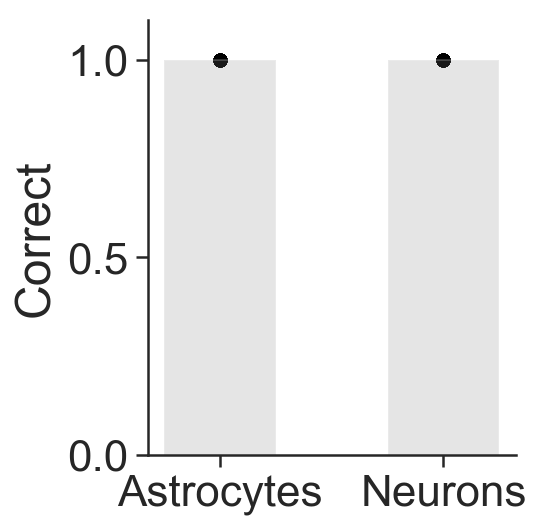

In [11]:
# Est stats
models = ["AAN", "ANN"]
means = [np.median(exp3["correct"]), np.median(exp3["correct"])]

fig = plt.figure(figsize=(3.3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.bar(models, means, color="grey", alpha=0.2, width=0.5)
plt.scatter(x=np.repeat(0, 20), y=exp3["correct"], color="black", alpha=0.6)
plt.scatter(x=np.repeat(1, 20), y=exp4["correct"], color="black", alpha=0.6)
plt.xticks(np.array([0,1]), ('Astrocytes', 'Neurons'))
plt.ylim(0, 1.1)
plt.ylabel("Correct")
_ = sns.despine()